In [24]:
from langchain.chat_models import init_chat_model
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition

In [25]:
from dotenv import load_dotenv
load_dotenv()

True

In [26]:
class State(TypedDict):     #type hint

 messages: Annotated[list, add_messages]

In [27]:
@tool                                          #docstring useful for llm ,In real life we can use
                                              #Some finance Api

def get_stock_price(symbol: str) -> float:
    '''Return the current price of a stock given the stock symbol
    :param symbol: stock symbol
    :return: current price of the stock
    '''
    return {
        "MSFT": 200.3,
        "AAPL": 100.4,
        "AMZN": 150.0,
        "RIL": 87.6
    }.get(symbol, 0.0)               #0 is like fallback if the stock symbol is not there

tools = [get_stock_price]

In [28]:
import os

In [29]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model="openai/gpt-oss-120b",
    api_key=os.getenv("GROQ_API_KEY")
)

In [37]:
llm_with_tools = llm.bind_tools(tools) # binding my tool with llm

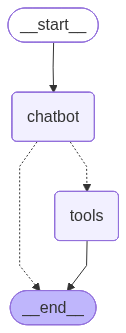

In [38]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)                #graph with state

builder.add_node(chatbot)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "chatbot")
builder.add_conditional_edges("chatbot", tools_condition)# it will either go to tools or end
                                            # so no  need of end edge


graph = builder.compile()

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [44]:
state = graph.invoke({"messages": [{"role": "user", "content": "What is the price of AAPL stock right now?"}]})
print(state["messages"][-1].content)  # its going to tool as its a relevant message that needs tool acess

100.4


In [43]:

state = graph.invoke({"messages": [{"role": "user", "content": "Who created NATO"}]})
print(state["messages"][-1].content)  # No need of tool access when other question is asked
                                      # that does not require tool acess




The North Atlantic Treaty Organization (NATO) was created through a collective effort by a group of Western nations after World II, formalized by the signing of the **North Atlantic Treaty** on **4 April 1949**.

**Founding members (the original 12 signatories of the treaty):**

| Country | Role in NATO’s Creation |
|---------|--------------------------|
| United States | Principal sponsor and driving force behind the alliance’s concept |
| United Kingdom | Key European partner, helped shape the treaty’s political framework |
| France | Major European contributor to the security architecture |
| Canada | North‑American partner that helped balance U.S. influence |
| Belgium | One of the continental European founders |
| Denmark | Early supporter of collective defense |
| Iceland | Strategic location in the North Atlantic |
| Italy | Joined the alliance to secure its post‑war security |
| Luxembourg | Small but committed founding member |
| Netherlands | Integral part of the Western Euro

In [ ]:
#### Now let me  add context and make it agentic in susnata_Tool_call_agent